In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("./data.csv")

# Assuming the last column is the target and others are features (modify as necessary)
y = data['Adj Close'].values

data= data.drop(columns=['Close', 'Date','Open', 'Low', 'Adj Close', 'High'])# Define features and target
X = data.values

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the Random Forest model and parameter grid
param_grid = {
    'n_estimators': [10, 25, 50],
    'max_depth': [5, 9, 15],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [5, 9, 15]
}

In [5]:
# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

In [6]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 9, 15],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [5, 9, 15],
                         'n_estimators': [10, 25, 50]},
             scoring='neg_mean_squared_error')

In [7]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [8]:
# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (negative MSE):", grid_search.best_score_)
# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Test R^2 Score:", r2_score(y_test, y_pred))

Best Parameters: {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 15, 'n_estimators': 50}
Best Cross-Validation Score (negative MSE): -4.666642790518075
Test Mean Squared Error: 5.087572058282812
Test R^2 Score: 0.9836768569220649


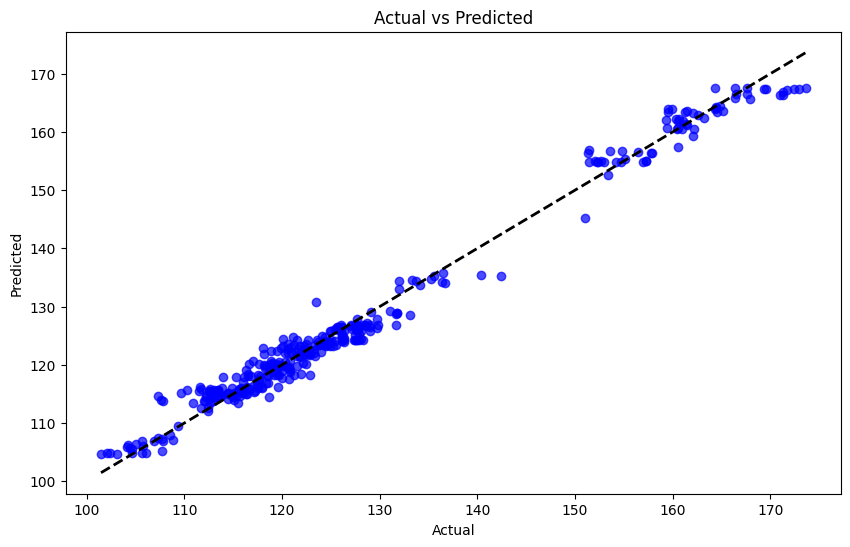

In [9]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

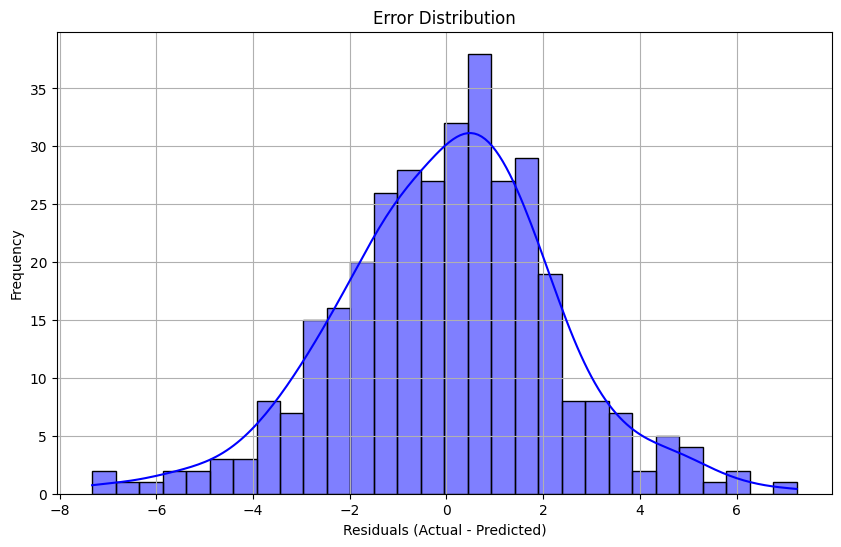

In [10]:
# Error Distribution Plot
import seaborn as sns
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

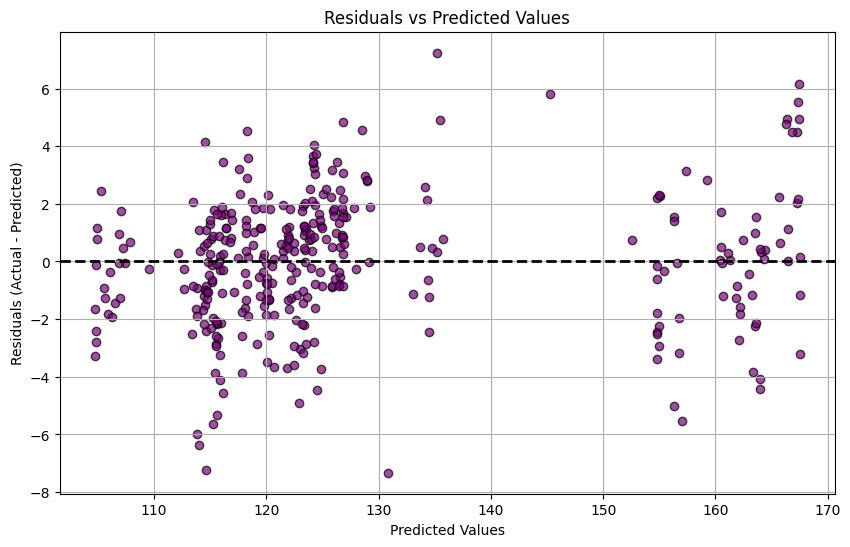

In [11]:
# Residuals Error Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='purple', edgecolor='k')
plt.axhline(y=0, color='black', linestyle='--', lw=2)  # Reference line for zero residuals
plt.title("Residuals vs Predicted Values")  # Plot title
plt.xlabel("Predicted Values")  # X-axis label
plt.ylabel("Residuals (Actual - Predicted)")  # Y-axis label
plt.grid(True)  # Add grid for better readability
plt.show()